## Chapter 4

In [6]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import griddata
import pandas as pd
import arviz as az

In [7]:
%config InLineBackEnd.figure_format = 'retina'
az.style.use('arviz-darkgrid')

## Random walk simulation

In [68]:
pos = np.random.choice([-1,1],size=(16,1000)).sum(0)

Text(0, 0.5, 'density')

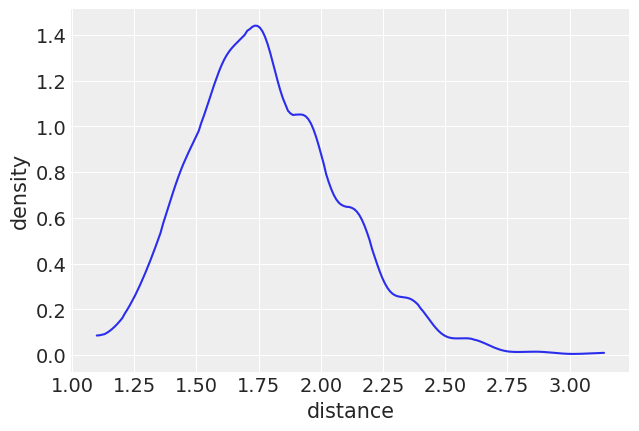

In [74]:
az.plot_kde(pos)
plt.xlabel('distance')
plt.ylabel('density')

## Multiplicative random walk with small steps

In [71]:
pos = np.random.choice([1,1.1],size=(12,1000)).prod(0)

Text(0, 0.5, 'density')

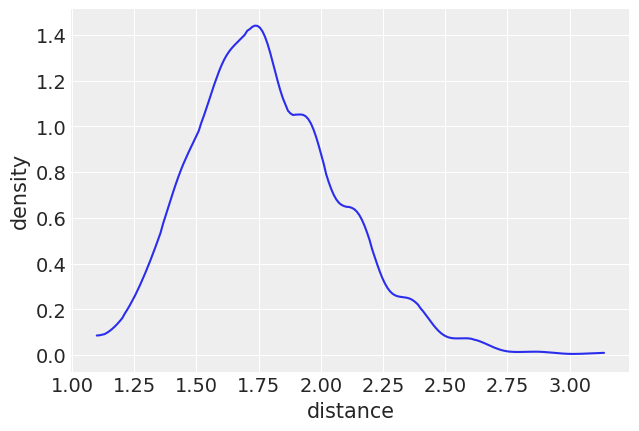

In [76]:
az.plot_kde(pos)
plt.xlabel('distance')
plt.ylabel('density')

## multiplicative random walk with big steps

In [77]:
pos = np.random.choice([1,1.5],size=(12,10000)).prod(0)

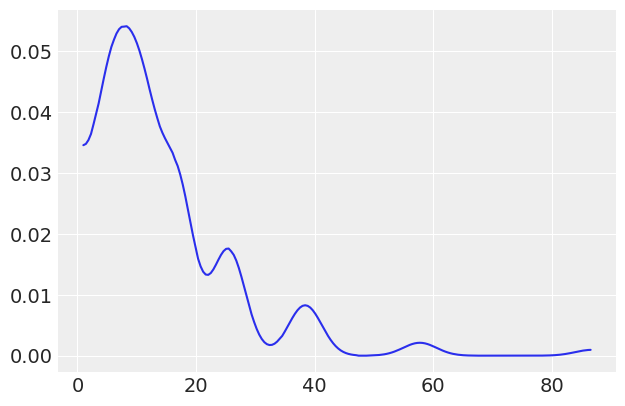

In [78]:
az.plot_kde(pos)

## multiplicative random walk with really small steps

In [79]:
pos = np.random.choice([1,1.01],size=(12,10000)).prod(0)

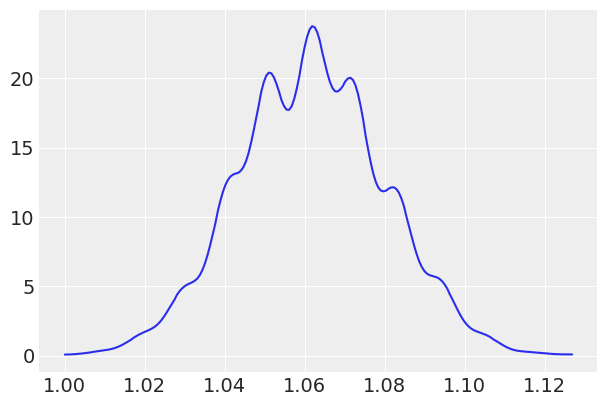

In [61]:
az.plot_kde(pos)

## Logarithm of multiplicative random walk with big steps

In [80]:
pos = np.log(np.random.choice([1,1.5],size=(12,10000)).prod(0))

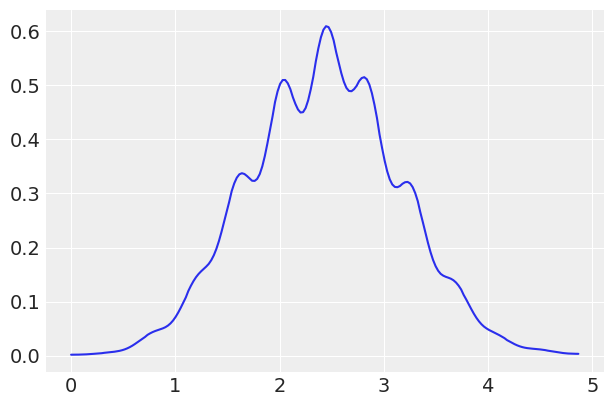

In [81]:
az.plot_kde(pos)

# Definining a bayesian model

$$ x \sim \textrm{Normal}(\mu_i,\sigma) $$

$$ P(p \mid w,n) = \frac{\textrm{Binomial}(w \mid n,p)  \textrm{Uniform}(p \mid 0,1)}{\int \textrm{Binomial}(w \mid n,p)\textrm{Uniform}(p \mid 0,1) dp} $$

$$ P(a \mid b) = \frac{P(b \mid a) P(a)}{P(b)} $$

# !Kung San Data

In [87]:
a = pd.read_csv('../resources/Rethinking/Data/Howell1.csv', sep = ';')

In [88]:
a.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


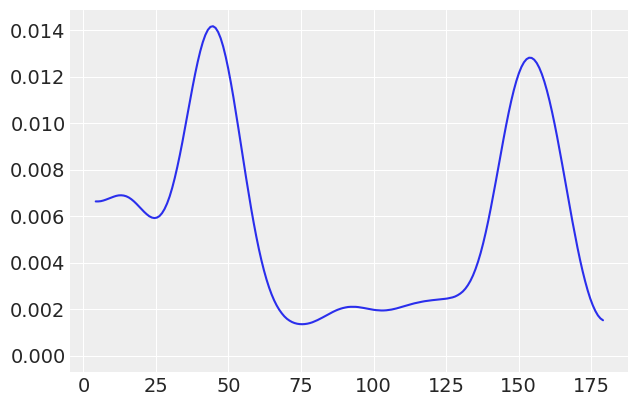

In [91]:
az.plot_kde([a['height'],a['weight']])